In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt

In [2]:
file=pd.read_csv("F:/machine_learning/project/data/fer2013.csv")
file


,emotion,Usage,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,...,pixels2295,pixels2296,pixels2297,pixels2298,pixels2299,pixels2300,pixels2301,pixels2302,pixels2303,pixels2304
0,0,Training,70,80,82,72,58,58,60,63,...,159,182,183,136,106,116,95,106,109,82
1,0,Training,151,150,147,155,148,133,111,140,...,105,108,95,108,102,67,171,193,183,184
2,2,Training,231,212,156,164,174,138,161,173,...,104,138,152,122,114,101,97,88,110,152
3,4,Training,24,32,36,30,32,23,19,20,...,174,126,132,132,133,136,139,142,143,142
4,6,Training,4,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,2,Training,55,55,55,55,55,54,60,68,...,90,83,77,53,37,34,30,34,30,57
6,4,Training,20,17,19,21,25,38,42,42,...,29,36,68,91,85,93,97,99,107,118
7,3,Training,77,78,79,79,78,75,60,55,...,126,124,139,150,179,180,175,125,67,68
8,3,Training,85,84,90,121,101,102,133,153,...,132,151,111,106,102,99,89,58,73,84
9,2,Training,255,254,255,254,254,179,122,107,...,160,176,188,251,252,253,253,254,255,255


In [3]:
valid=file.loc[file.Usage=="PrivateTest"]
train=file.loc[file.Usage=="Training"]
test=file.loc[file.Usage=="PublicTest"]

In [4]:
def creat_data_set(x,task):
    N,P=x.shape
    Y=x.emotion.values
    assert np.sqrt(P-2)-int(np.sqrt(P-2))==0
    if task=="rnn":
        X=np.zeros((int(np.sqrt(P-2)),int(np.sqrt(P-2)),N))
    elif task=="cnn":
        X=np.zeros((N,int(np.sqrt(P-2)),int(np.sqrt(P-2)),1))
    else:
        raise ValueError
    x=x.drop(["Usage","emotion"],axis=1)
    for i in range(N):
        if task=="rnn":
            X[:,:,i]=x.iloc[i].values.reshape(48,48)
        else:
            X[i,:,:,0]=x.iloc[i].values.reshape(48,48)
    return Y,X

def normalize(x,mean,task):
    if task=="rnn":
        for i in range(x.shape[-1]):
            x[:,:,i]-=mean
    elif task=="cnn":
        for i in range(x.shape[0]):
            x[i,:,:,:]-=mean
    else:
        raise ValueError
    x/=255
    return
    

In [5]:
train_set_rnn=creat_data_set(train,"rnn")
valid_set_rnn=creat_data_set(valid,"rnn")
test_set_rnn=creat_data_set(test,"rnn")
train_set_cnn=creat_data_set(train,"cnn")
valid_set_cnn=creat_data_set(valid,"cnn")
test_set_cnn=creat_data_set(test,"cnn")
mean1=np.mean(train_set_rnn[1],axis=2)
mean2=np.mean(train_set_cnn[1],axis=0)

In [7]:
normalize(train_set_rnn[1],mean1,"rnn")
normalize(valid_set_rnn[1],mean1,"rnn")
normalize(test_set_rnn[1],mean1,"rnn")
normalize(train_set_cnn[1],mean2,"cnn")
normalize(valid_set_cnn[1],mean2,"cnn")
normalize(test_set_cnn[1],mean2,"cnn")

In [11]:
save_dir="F:/machine_learning/project/data"
with open(save_dir+"/train_set_rnn","wb") as f:
    pickle.dump(train_set_rnn,f)
with open(save_dir+"/valid_set_rnn","wb") as f:
    pickle.dump(valid_set_rnn,f)
with open(save_dir+"/test_set_rnn","wb") as f:
    pickle.dump(test_set_rnn,f)
with open(save_dir+"/train_set_cnn","wb") as f:
    pickle.dump(train_set_cnn,f)
with open(save_dir+"/valid_set_cnn","wb") as f:
    pickle.dump(valid_set_cnn,f)
with open(save_dir+"/test_set_cnn","wb") as f:
    pickle.dump(test_set_cnn,f)

In [6]:
train_set_cnn[1][0,:,:,0].shape

(48, 48)

In [10]:
Y,X=train_set_cnn

In [38]:
np.argwhere(Y==6)


array([[    4],
       [   11],
       [   12],
       ..., 
       [28681],
       [28693],
       [28699]], dtype=int64)

In [17]:
X[5,:,:,0].shape

(48, 48)

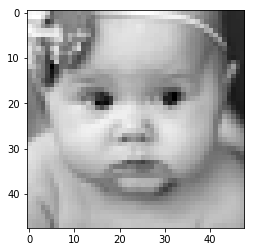

In [41]:
plt.imshow(X[28693,:,:,0],cmap="gray")
plt.show()